In [6]:
# Installs e imports necesarios
import numpy as np
from numpy import mean
from numpy import std
import pandas as pd
import pydotplus
import graphviz
from dmba import plotDecisionTree, classificationSummary, regressionSummary

# Graphics
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt

# Preprocessing and modelling
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPRegressor
import multiprocessing



from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import mean_squared_error
# mlxtend library
# ------------------------------------------------------------------------------

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

import matplotlib.pyplot as plt
import seaborn as sns
from dmba import plotDecisionTree, classificationSummary, regressionSummary

%matplotlib inline

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
#warnings.filterwarnings('once')
warnings.filterwarnings('ignore')

In [7]:
import seaborn as sns    
raw_data = pd.read_csv('cardio_train.csv', sep=';')
#quiero que se indexe raw_data por id
raw_data.set_index('id', inplace=True)
raw_data

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
99996,19066,2,183,105.0,180,90,3,1,0,1,0,1


In [8]:
# Display the number of rows and all column names
raw_data=raw_data.dropna()
num_rows = raw_data.shape[0]
all_columns = raw_data.columns.tolist()

num_rows, all_columns

(70000,
 ['age',
  'gender',
  'height',
  'weight',
  'ap_hi',
  'ap_lo',
  'cholesterol',
  'gluc',
  'smoke',
  'alco',
  'active',
  'cardio'])

In [9]:
# Estadísticas descriptivas de las personas estudiadas
print("Estadísticas de pacientes:")
# Calcula la media de la columna 'avg_salary'
average_age_days = raw_data['age'].mean()
average_age_years = average_age_days/365
#convierte los decimales de average_age_years a meses
#coge la parte decimal de average_age_years y la multiplica por 12
decimal_part = average_age_years - int(average_age_years)
average_age_months = decimal_part * 12

# Imprime el resultado redondeado a dos decimales
print(f"Edad media del estuido: {int(average_age_years)} años y {int(average_age_months)} meses")

Estadísticas de pacientes:
Edad media del estuido: 53 años y 4 meses


In [10]:
#Número de pacientes con cardio=1 y #cardio=0

num_cardio = raw_data['cardio'].sum()
print(f"Pacientes con enfermedades cardiovasculares: {int(num_cardio)}")

num_n_cardio = len(raw_data['cardio']) - raw_data['cardio'].sum()
print(f"Pacientes sin enfermedades cardiovasculares: {int(num_n_cardio)}")


Pacientes con enfermedades cardiovasculares: 34979
Pacientes sin enfermedades cardiovasculares: 35021


In [11]:
# Creating new Variables

raw_data['bmi'] = (raw_data['weight'] / (((raw_data['height']/100)**2))).round(decimals=2)   # Body mass index
raw_data['age_years'] = (raw_data['age']/365).round(decimals=2)                               # Age in years

#creando variable overweight
#0 si el bmi es menor que 25, 1 si es mayor o igual que 25 y menor que 30, 2 si es mayor o igual que 30
raw_data['overweight'] = raw_data['bmi'].apply(lambda x: 0 if x < 25 else 1 if x < 30 else 2)
raw_data['gender_string'] = raw_data['gender'].apply(lambda x: 'female' if x == 1 else 'male')

raw_data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,age_years,overweight,gender_string
id,,,,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.97,50.39,0,male
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.93,55.42,2,female
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.51,51.66,0,female
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.71,48.28,1,male
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.01,47.87,0,female


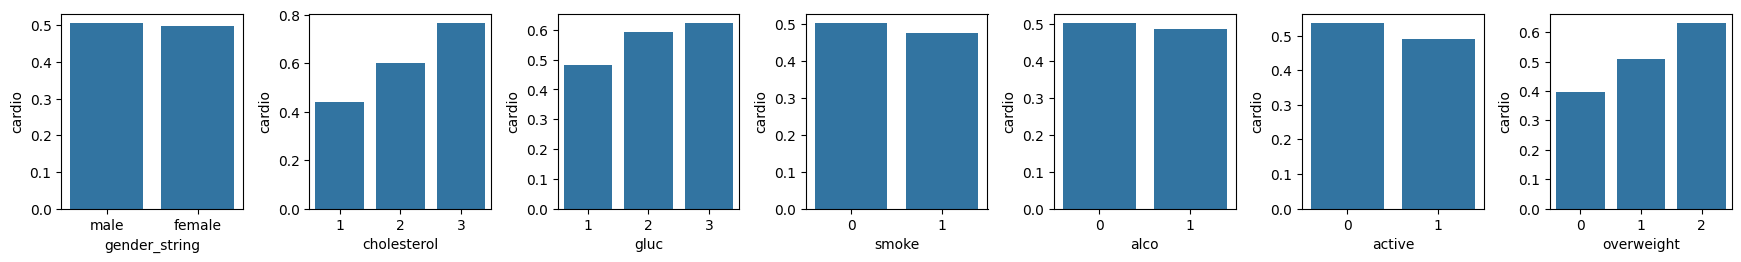

<Figure size 200x200 with 0 Axes>

<Figure size 200x200 with 0 Axes>

<Figure size 200x200 with 0 Axes>

<Figure size 200x200 with 0 Axes>

<Figure size 200x200 with 0 Axes>

<Figure size 200x200 with 0 Axes>

<Figure size 200x200 with 0 Axes>

In [12]:
# Visualizing Discrete variables and its effects on cardio
variables = ('gender_string', 'cholesterol',	'gluc',	'smoke','alco',	'active', 'overweight')
fig=plt.figure(figsize=(20,20))
j = 1
for i in variables:
  ax=fig.add_subplot(8,8,j)
  j = j + 1
  plt.figure(figsize=(2, 2))
  sns.barplot(x=i,y='cardio',data=raw_data,ci=None,ax=ax)
  fig.tight_layout()  
plt.show()

Text(0, 0.5, 'Num personas')

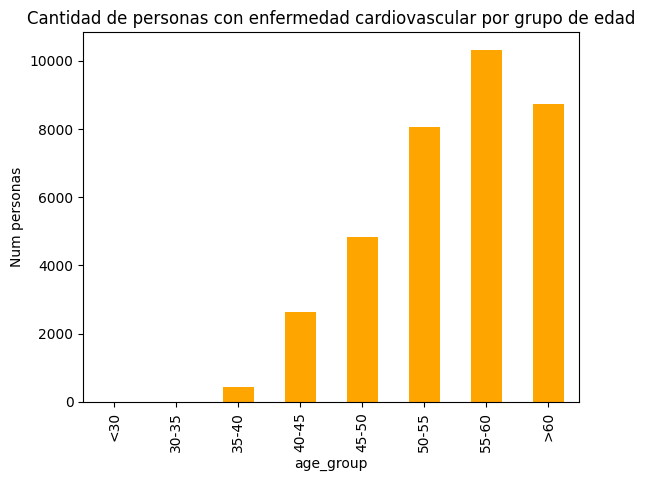

In [13]:
# Analisis de edades
raw_data['age_years'].min()#29.58
raw_data['age_years'].max()#64.97

# agrupar raw_data en 8 grupos de edades: <30, 30-35, 35-40, 40-45, 45-50, 50-55, 55-60, >60
raw_data['age_group'] = pd.cut(raw_data['age_years'], bins=[29, 30, 35, 40, 45, 50, 55, 60, 65], labels=['<30', '30-35', '35-40', '40-45', '45-50', '50-55', '55-60', '>60'])
#plot cantidad de personas en cada grupo con cardio=1
raw_data.groupby('age_group')['cardio'].sum() #hacer plot de esto
raw_data.groupby('age_group')['cardio'].sum().plot(kind='bar', color='orange') #titulo: cantidad de personas con enfermedad cardiovascular por grupo de edad
plt.title('Cantidad de personas con enfermedad cardiovascular por grupo de edad')
plt.ylabel('Num personas')

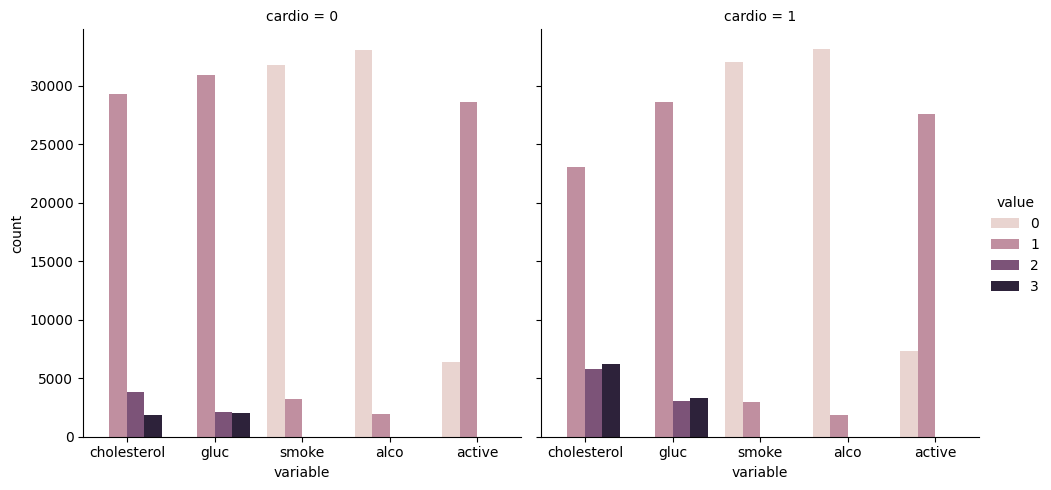

In [14]:
df_long = pd.melt(raw_data, id_vars=['cardio'], value_vars=['cholesterol','gluc', 'smoke', 'alco', 'active'])
sns.catplot(x="variable", hue="value", col="cardio",
                data=df_long, kind="count")

Text(0.5, 1.0, 'Correlation Map')

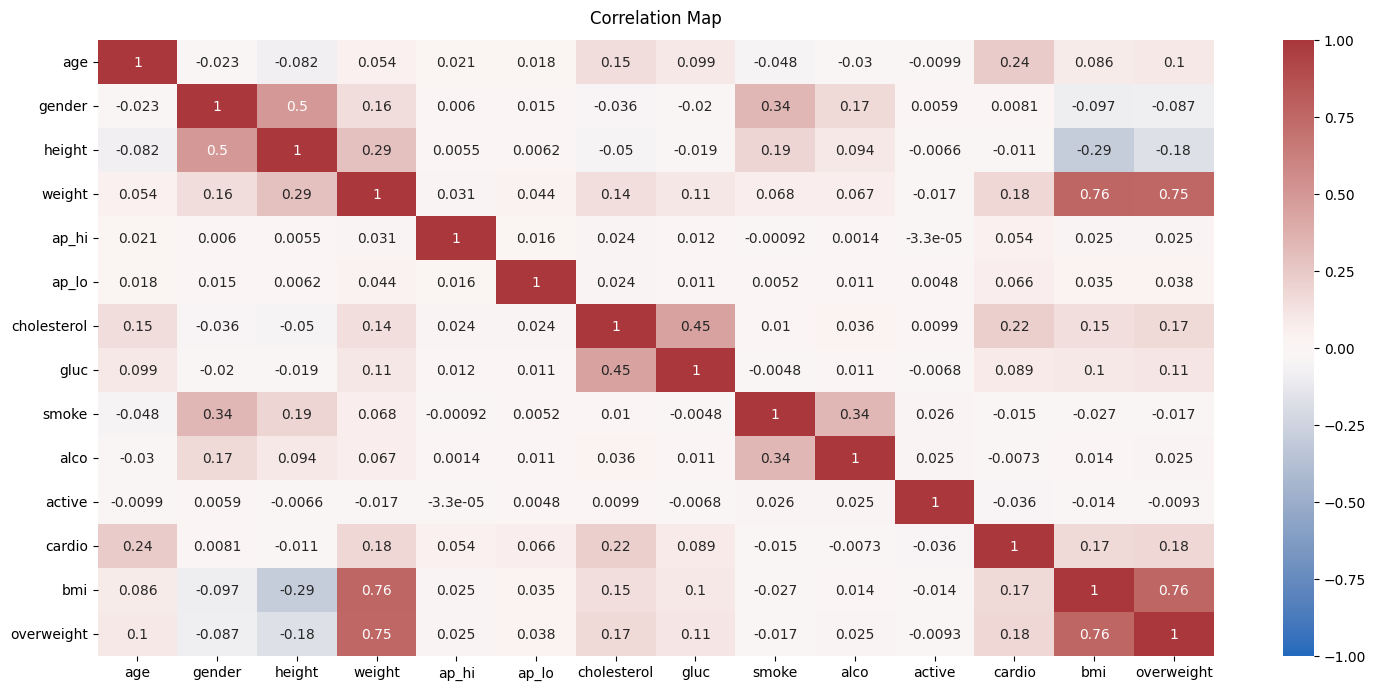

In [15]:
# Matriz de correlacion
# Correlation matrix to understand relation between variables

plt.figure(figsize=(18, 8))
data_without_age_gender = raw_data.drop(columns=['gender_string', 'age_group', 'age_years'])
sns.heatmap(data_without_age_gender.corr(), vmin=-1, vmax=1, annot=True, cmap='vlag') #raw_data sin age_gender

# cmap='BrBG'
plt.title('Correlation Map', fontdict={'fontsize':12}, pad=12)

## 1) Algoritmo Apriori

Vamos a tratar de encontrar los puestos mejor pagados del sector.
Para ello haremos uso del algoritmo Apriori usando TransactionEncoder

In [16]:
#buscar asociacion entre cardio=1 y overweight=2, active=1, smoke=1, alco=1, age_groups

Regla de asociación para personas como edad en cuartil mayor

In [17]:
threshold = raw_data['age'].quantile(0.75)
raw_data['high_age'] = raw_data['age'] >= threshold

In [18]:
# Preparar los datos para Transaction Encoder
#data_list = raw_data.apply(lambda row: [row['Job Title'], 'High Salary'] if row['high_salary'] else [row['Job Title']], axis=1).tolist()

# Transaction Encoder
#te = TransactionEncoder()
#te_ary = te.fit(data_list).transform(data_list)
#df = pd.DataFrame(te_ary, columns=te.columns_)
#data para algoritmo a priori
raw_data_apriori=raw_data.copy()
raw_data_apriori['obese']=raw_data_apriori['overweight'].apply(lambda x: 1 if x == 2 else 0)
raw_data_apriori['overweight']=raw_data_apriori['overweight'].apply(lambda x: 1 if x == 1 else 0)

raw_data_apriori['glucose_high']=raw_data_apriori['gluc'].apply(lambda x: 1 if x == 2 else 0)
raw_data_apriori['glucose_med']=raw_data_apriori['gluc'].apply(lambda x: 1 if x == 1 else 0)

raw_data_apriori['cholesterol_high']=raw_data_apriori['cholesterol'].apply(lambda x: 1 if x == 2 else 0)
raw_data_apriori['cholesterol_med']=raw_data_apriori['cholesterol'].apply(lambda x: 1 if x == 1 else 0)

raw_data_apriori['male']=raw_data_apriori['gender'].apply(lambda x: 1 if x == 1 else 0) #1 si es hombre, 0 si es mujer
raw_data_apriori=raw_data_apriori.drop(columns=['gender', 'age', 'height', 'weight', 'ap_hi', 'ap_lo', 'bmi', 'age_years', 'gluc', 'cholesterol', 'gender_string', 'age_group'])
raw_data_apriori.head()


,smoke,alco,active,cardio,overweight,high_age,obese,glucose_high,glucose_med,cholesterol_high,cholesterol_med,male
id,,,,,,,,,,,,
0,0,0,1,0,0,False,0,0,1,0,1,0
1,0,0,1,1,0,False,1,0,1,0,0,1
2,0,0,0,1,0,False,0,0,1,0,0,1
3,0,0,1,1,1,False,0,0,1,0,1,0
4,0,0,0,0,0,False,0,0,1,0,1,1


In [19]:
# Aplicar Apriori
#transformar datos
#algoritmo a priori con minimo sporte de 5%
res_apriori = apriori(raw_data_apriori, min_support=0.05, use_colnames=True, verbose=1)
# Generar reglas de asociación
rules = association_rules(res_apriori, metric ="lift", min_threshold = 1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
print(rules.head(30))

Processing 18 combinations | Sampling itemset size 65
                                           antecedents    consequents  \
412                (male, overweight, cholesterol_med)  (glucose_med)   
582        (male, overweight, active, cholesterol_med)  (glucose_med)   
190                            (male, cholesterol_med)  (glucose_med)   
321                    (male, active, cholesterol_med)  (glucose_med)   
87                           (active, cholesterol_med)  (glucose_med)   
271              (overweight, active, cholesterol_med)  (glucose_med)   
28                                   (cholesterol_med)  (glucose_med)   
156                      (overweight, cholesterol_med)  (glucose_med)   
632        (male, overweight, cholesterol_med, cardio)  (glucose_med)   
682  (male, overweight, active, cardio, cholesterol...  (glucose_med)   
328              (cardio, overweight, cholesterol_med)  (glucose_med)   
438      (overweight, cholesterol_med, active, cardio)  (glucose_med) 

In [20]:
#filtrar donde consecuencia sea cardio=1

rules_with_cardio = rules[rules['consequents'].apply(lambda x: len(x) == 1 and 'cardio' in x)]
rules_with_cardio.head()


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
107,"(high_age, obese)",(cardio),0.076671,0.4997,0.055629,0.725545,1.451961,0.017316,1.822885,0.337124
120,"(high_age, male)",(cardio),0.162986,0.4997,0.107871,0.661846,1.324487,0.026427,1.479503,0.292696
97,"(high_age, overweight)",(cardio),0.090743,0.4997,0.059657,0.657431,1.315651,0.014313,1.460435,0.263864
222,"(high_age, male, active)",(cardio),0.129971,0.4997,0.084971,0.653770,1.308325,0.020025,1.444993,0.270869
8,(high_age),(cardio),0.250071,0.4997,0.162900,0.651414,1.303610,0.037939,1.435226,0.310562


La mayor asociación para enfermedadees cardiovasculares es tener obseidad. Sorprende que haya asociaciación con la actividad, pero esto se puede deber a que independientemente de que la persona sea activa o no, si es obesa es propensa a tener esta enfermedad.Parece que la actividad es un factor poco determinante a la hora de reducir las probabilidades de sufrir enfermedades cardio. 

## 2) Árbol de decisión mediante CART

In [21]:
data_train = raw_data.drop(columns=['gender_string', 'age_group'])
data_train.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,age_years,overweight,high_age
id,,,,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.97,50.39,0,False
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.93,55.42,2,False
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.51,51.66,0,False
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.71,48.28,1,False
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.01,47.87,0,False


In [22]:
# Configuring train and test datasets
# ------------------------------------------------------------------------------

X_train, X_test, y_train, y_test = train_test_split(
                                        data_train.drop(columns = "cardio"),
                                        data_train['cardio'],
                                        train_size= 0.75, # by default 0.75 is the amunt of data for training
                                        random_state = 123
                                                            )     
 

In [23]:
X_train.info()
labels=X_train.columns

<class 'pandas.core.frame.DataFrame'>
Index: 52500 entries, 46257 to 22463
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          52500 non-null  int64  
 1   gender       52500 non-null  int64  
 2   height       52500 non-null  int64  
 3   weight       52500 non-null  float64
 4   ap_hi        52500 non-null  int64  
 5   ap_lo        52500 non-null  int64  
 6   cholesterol  52500 non-null  int64  
 7   gluc         52500 non-null  int64  
 8   smoke        52500 non-null  int64  
 9   alco         52500 non-null  int64  
 10  active       52500 non-null  int64  
 11  bmi          52500 non-null  float64
 12  age_years    52500 non-null  float64
 13  overweight   52500 non-null  int64  
 14  high_age     52500 non-null  bool   
dtypes: bool(1), float64(3), int64(11)
memory usage: 6.1 MB


In [24]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17500 entries, 31382 to 58043
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          17500 non-null  int64  
 1   gender       17500 non-null  int64  
 2   height       17500 non-null  int64  
 3   weight       17500 non-null  float64
 4   ap_hi        17500 non-null  int64  
 5   ap_lo        17500 non-null  int64  
 6   cholesterol  17500 non-null  int64  
 7   gluc         17500 non-null  int64  
 8   smoke        17500 non-null  int64  
 9   alco         17500 non-null  int64  
 10  active       17500 non-null  int64  
 11  bmi          17500 non-null  float64
 12  age_years    17500 non-null  float64
 13  overweight   17500 non-null  int64  
 14  high_age     17500 non-null  bool   
dtypes: bool(1), float64(3), int64(11)
memory usage: 2.0 MB


In [25]:
# count of each category value and checking categories in training and in test

train_count= y_train.value_counts()
print("Training :\n", train_count)

test_count=y_test.value_counts()
print("\n Test :\n", test_count)


rows_train = len(X_train.axes[0]) 

rows_test = len(X_test.axes[0])

print("\n Porcentaje de casos de cada clase en training", 
      round(train_count[0]/rows_train,2), round(train_count[1]/rows_train,2))
print("\n Porcentaje de casos de cada clase en test  ", round(test_count[0]/rows_test,2), round(test_count[1]/rows_test,2))

Training :
 cardio
1    26278
0    26222
Name: count, dtype: int64

 Test :
 cardio
0    8799
1    8701
Name: count, dtype: int64

 Porcentaje de casos de cada clase en training 0.5 0.5

 Porcentaje de casos de cada clase en test   0.5 0.5


In [26]:
# Creating the model with decision tree
# ------------------------------------------------------------------------------
model = DecisionTreeClassifier(
            max_depth         = 5,
            criterion         = 'gini',
            random_state      = 123
          )

# Entrenamiento del modelo
# ------------------------------------------------------------------------------
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=123)

Tree Depth: 5


Number of leaves or terminal nodes: 32


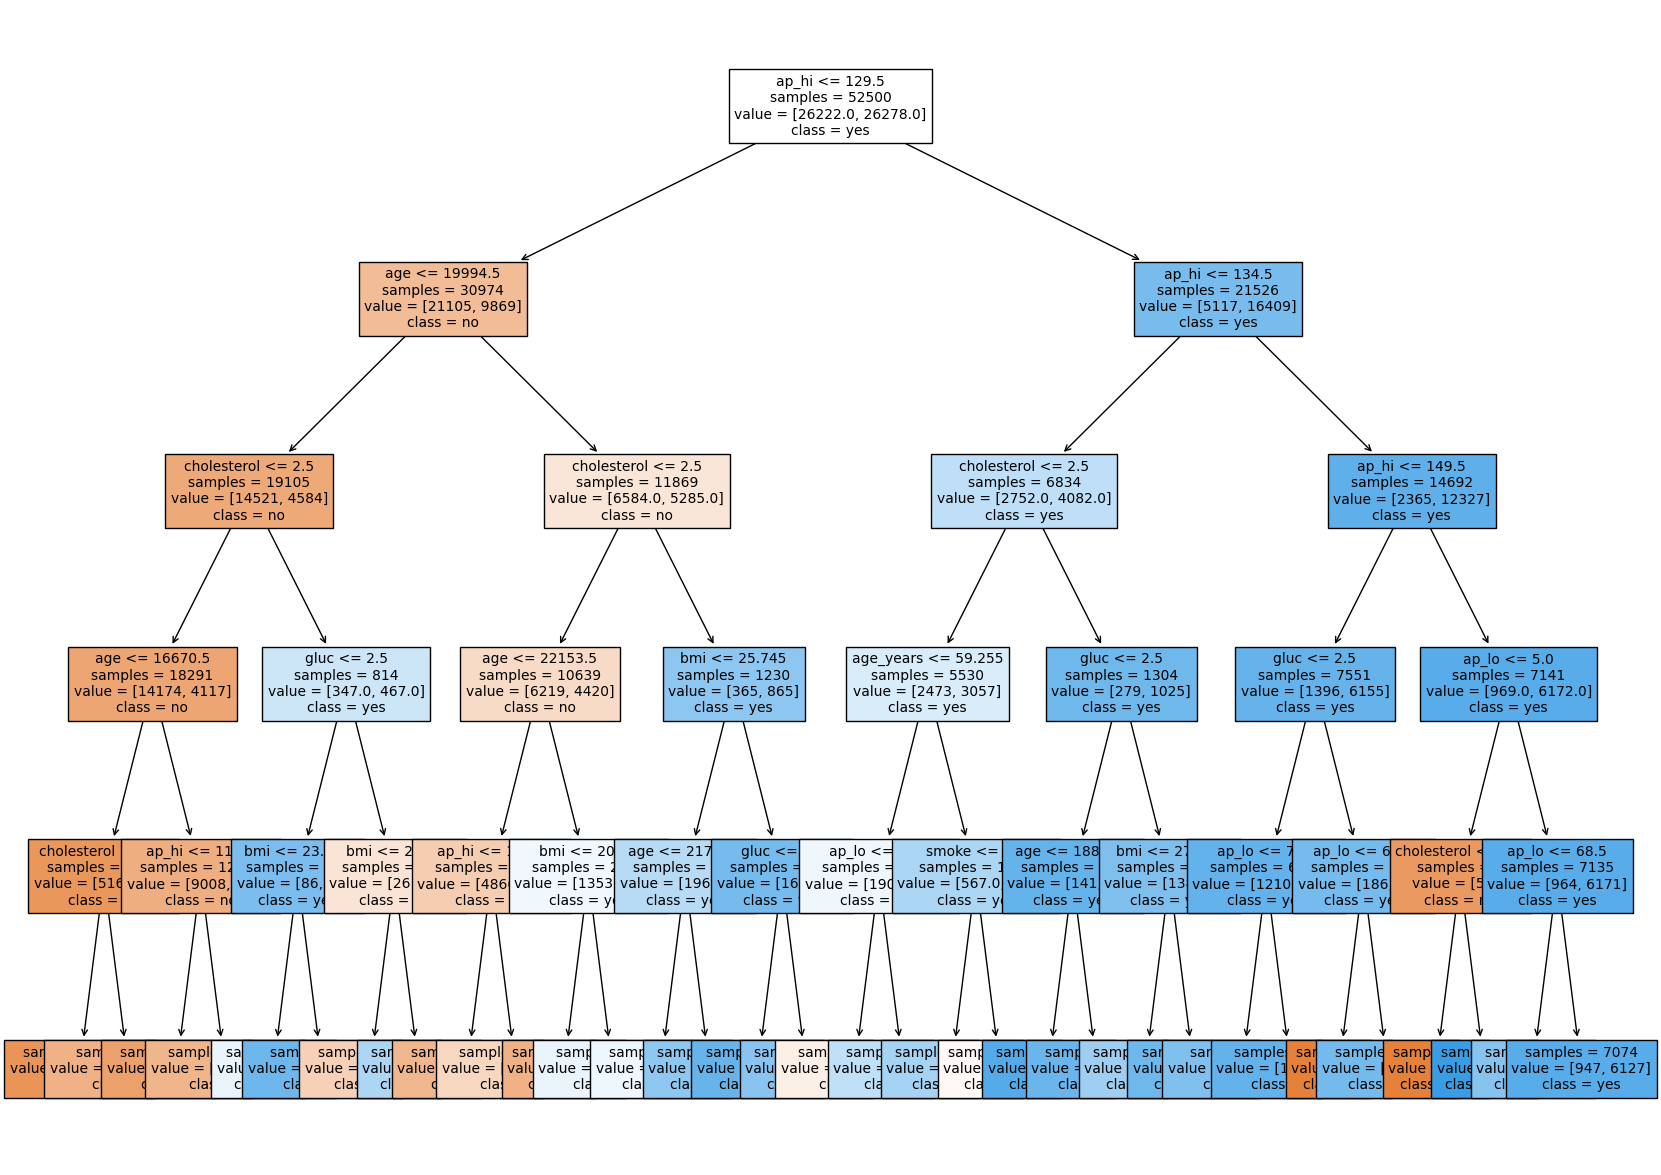

In [27]:
# Estructura del árbol creado
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(20, 15))

print(f"Tree Depth: {model.get_depth()}")
print(f"Number of leaves or terminal nodes: {model.get_n_leaves()}")

plot = plot_tree(
            decision_tree = model,
            feature_names = labels.tolist(),
            class_names   = ['no', 'yes'],
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            ax            = ax
       )

In [28]:
# get the text representation
from sklearn import tree
#text_representation = tree.export_text(model)  # generic features

text_representation = tree.export_text(model, feature_names= list(X_train.columns.values) )



print(text_representation)

|--- ap_hi <= 129.50
|   |--- age <= 19994.50
|   |   |--- cholesterol <= 2.50
|   |   |   |--- age <= 16670.50
|   |   |   |   |--- cholesterol <= 1.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- cholesterol >  1.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- age >  16670.50
|   |   |   |   |--- ap_hi <= 119.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- ap_hi >  119.50
|   |   |   |   |   |--- class: 0
|   |   |--- cholesterol >  2.50
|   |   |   |--- gluc <= 2.50
|   |   |   |   |--- bmi <= 23.09
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- bmi >  23.09
|   |   |   |   |   |--- class: 1
|   |   |   |--- gluc >  2.50
|   |   |   |   |--- bmi <= 29.32
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- bmi >  29.32
|   |   |   |   |   |--- class: 1
|   |--- age >  19994.50
|   |   |--- cholesterol <= 2.50
|   |   |   |--- age <= 22153.50
|   |   |   |   |--- ap_hi <= 118.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- ap_hi >  118.50

In [29]:
# Model training error
#-------------------------------------------------------------------------------
predictions_train = model.predict(X = X_train,)

print("Confussion Matrix -- TRAIN")
print("-------------------")
confusion_matrix(
    y_true    = y_train,
    y_pred    = predictions_train
)

Confussion Matrix -- TRAIN
-------------------


array([[20650,  5572],
       [ 8391, 17887]], dtype=int64)

In [30]:
accuracy_train = accuracy_score(
            y_true    = y_train,
            y_pred    = predictions_train,
            normalize = True
           )
#print(f"Accuracy in train : {100 * accuracy_train} %")
print("\n Accuracy in train 1s: {:.2f} %".format(100 * accuracy_train))


 Accuracy in train 1s: 73.40 %


In [31]:
# Model test error
#-------------------------------------------------------------------------------
predictions_test = model.predict(X = X_test,)

print("Confussion Matrix -- TEST")
print("-------------------")
confusion_matrix(
    y_true    = y_test,
    y_pred    = predictions_test
)

Confussion Matrix -- TEST
-------------------


array([[6877, 1922],
       [2768, 5933]], dtype=int64)

In [32]:
accuracy_test = accuracy_score(
            y_true    = y_test,
            y_pred    = predictions_test,
            normalize = True
           )
#print(f"Accuracy in test 1s: {100 * accuracy_test} %")

print("\n Accuracy in test 1s: {:.2f} %".format(100 * accuracy_test))


 Accuracy in test 1s: 73.20 %


El modelo actual tiene una profundida máxima de 5
Hay que estudiarlo con más profundida para encontrar su profundidad máxima y el alpha por donde podar el árbol

In [33]:
# Analyzing Pruning
#-------------------------


#SEVERAL METHODS ARE PROPOSED BELOW

In [34]:
# Common-sense selection of alpha based on cost-complexity values

#Obtaining diferent options of alpha values

path = model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

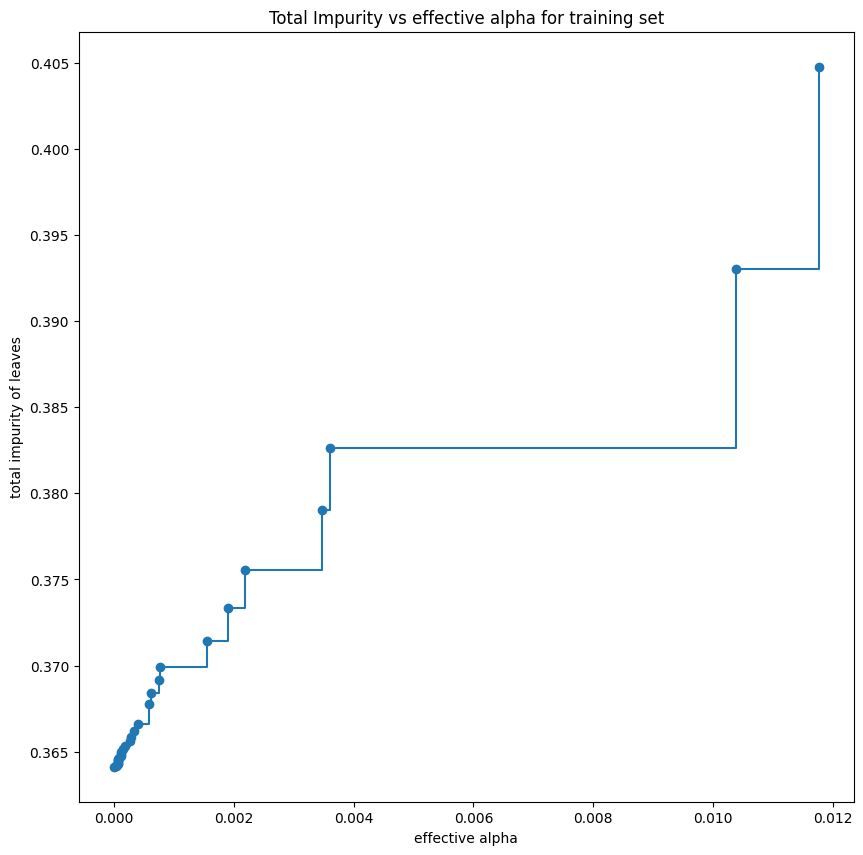

In [35]:
# Representation Impurity vs effective alpha for training set

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [36]:
# Different alpha options are tried
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 3 with ccp_alpha: 0.09523204996401502


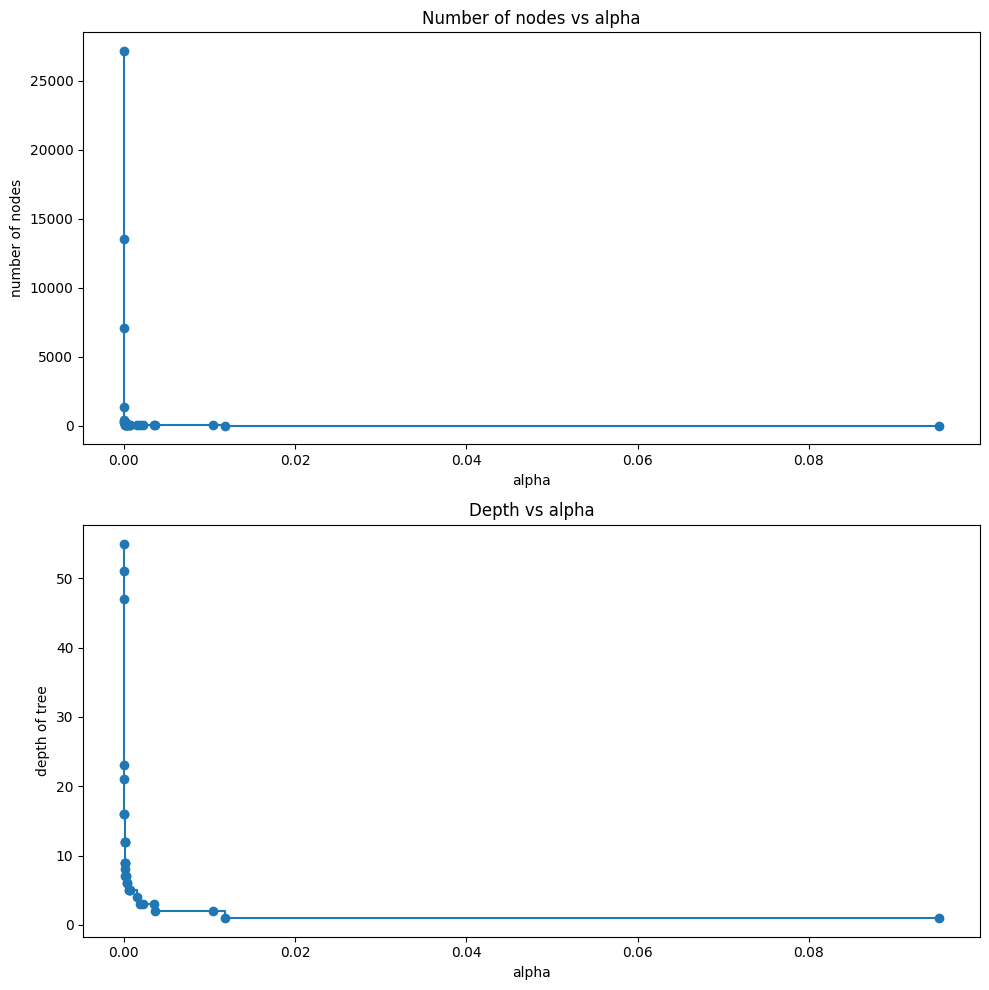

In [37]:
# we remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node
# This is not classification

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots( 2, 1, figsize=(10,10))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

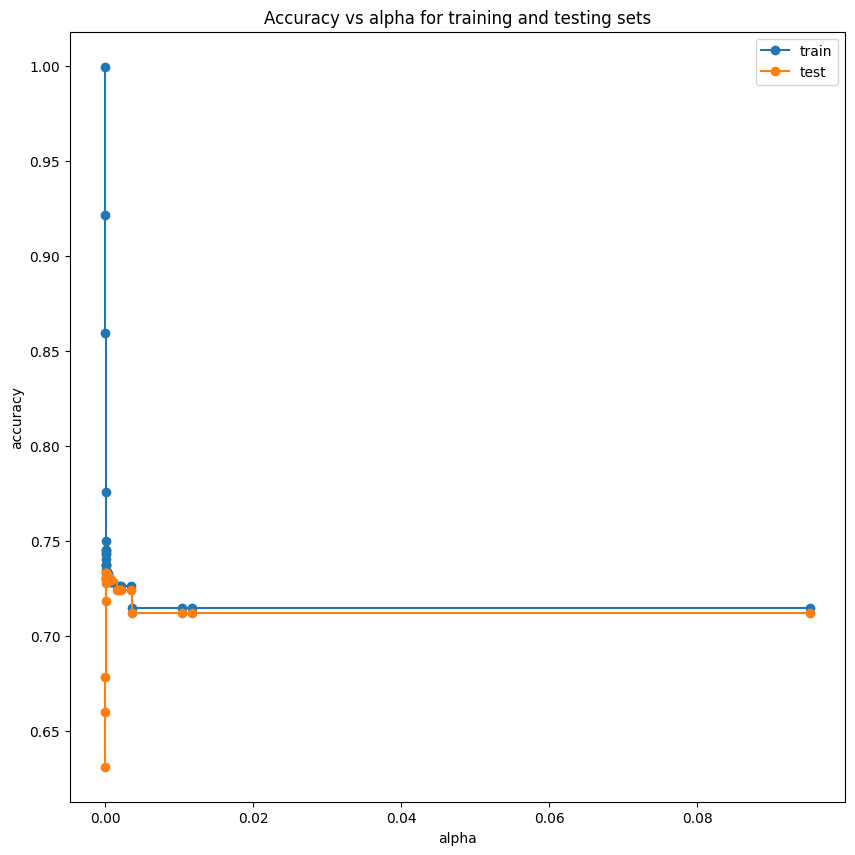

In [38]:
# Cheking scores in training and test datasets for different alphas

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [39]:
# the scores obtained are now printed and ordered by the best test score

eva_df = pd.DataFrame({'ccp_alphas': ccp_alphas, 'train_scores': train_scores, 'test_scores': test_scores})
eva_df = eva_df.sort_values(['test_scores'], ascending = False)
eva_df.head(10)

,ccp_alphas,train_scores,test_scores
10,0.000110,0.737086,0.733029
12,0.000120,0.737010,0.732971
11,0.000111,0.737010,0.732971
13,0.000154,0.734457,0.732743
14,0.000176,0.733600,0.731543
15,0.000272,0.733600,0.731543
16,0.000276,0.732590,0.731200
17,0.000338,0.732324,0.731200
18,0.000407,0.732324,0.731200
9,0.000081,0.740171,0.731143


In [40]:
# Obtaining the best alpha from the previous list
best_alpha= eva_df.iloc[0][0]

best_alpha

0.0001103505043209517

In [41]:
# fit the pruned tree with best alpha
import pydotplus
from dmba import plotDecisionTree, classificationSummary, regressionSummary

prunedtree_I = DecisionTreeClassifier(ccp_alpha=best_alpha, random_state=0)

prunedtree_I.fit(X_train, y_train)


classificationSummary(y_train, prunedtree_I.predict(X_train))
classificationSummary(y_test, prunedtree_I.predict(X_test))

Confusion Matrix (Accuracy 0.7371)

       Prediction
Actual     0     1
     0 20942  5280
     1  8523 17755
Confusion Matrix (Accuracy 0.7330)

       Prediction
Actual    0    1
     0 6946 1853
     1 2819 5882


In [42]:
plotDecisionTree(prunedtree_I, feature_names=X_train.columns)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

Tree Depth: 9
Number of leaves or terminal nodes: 39


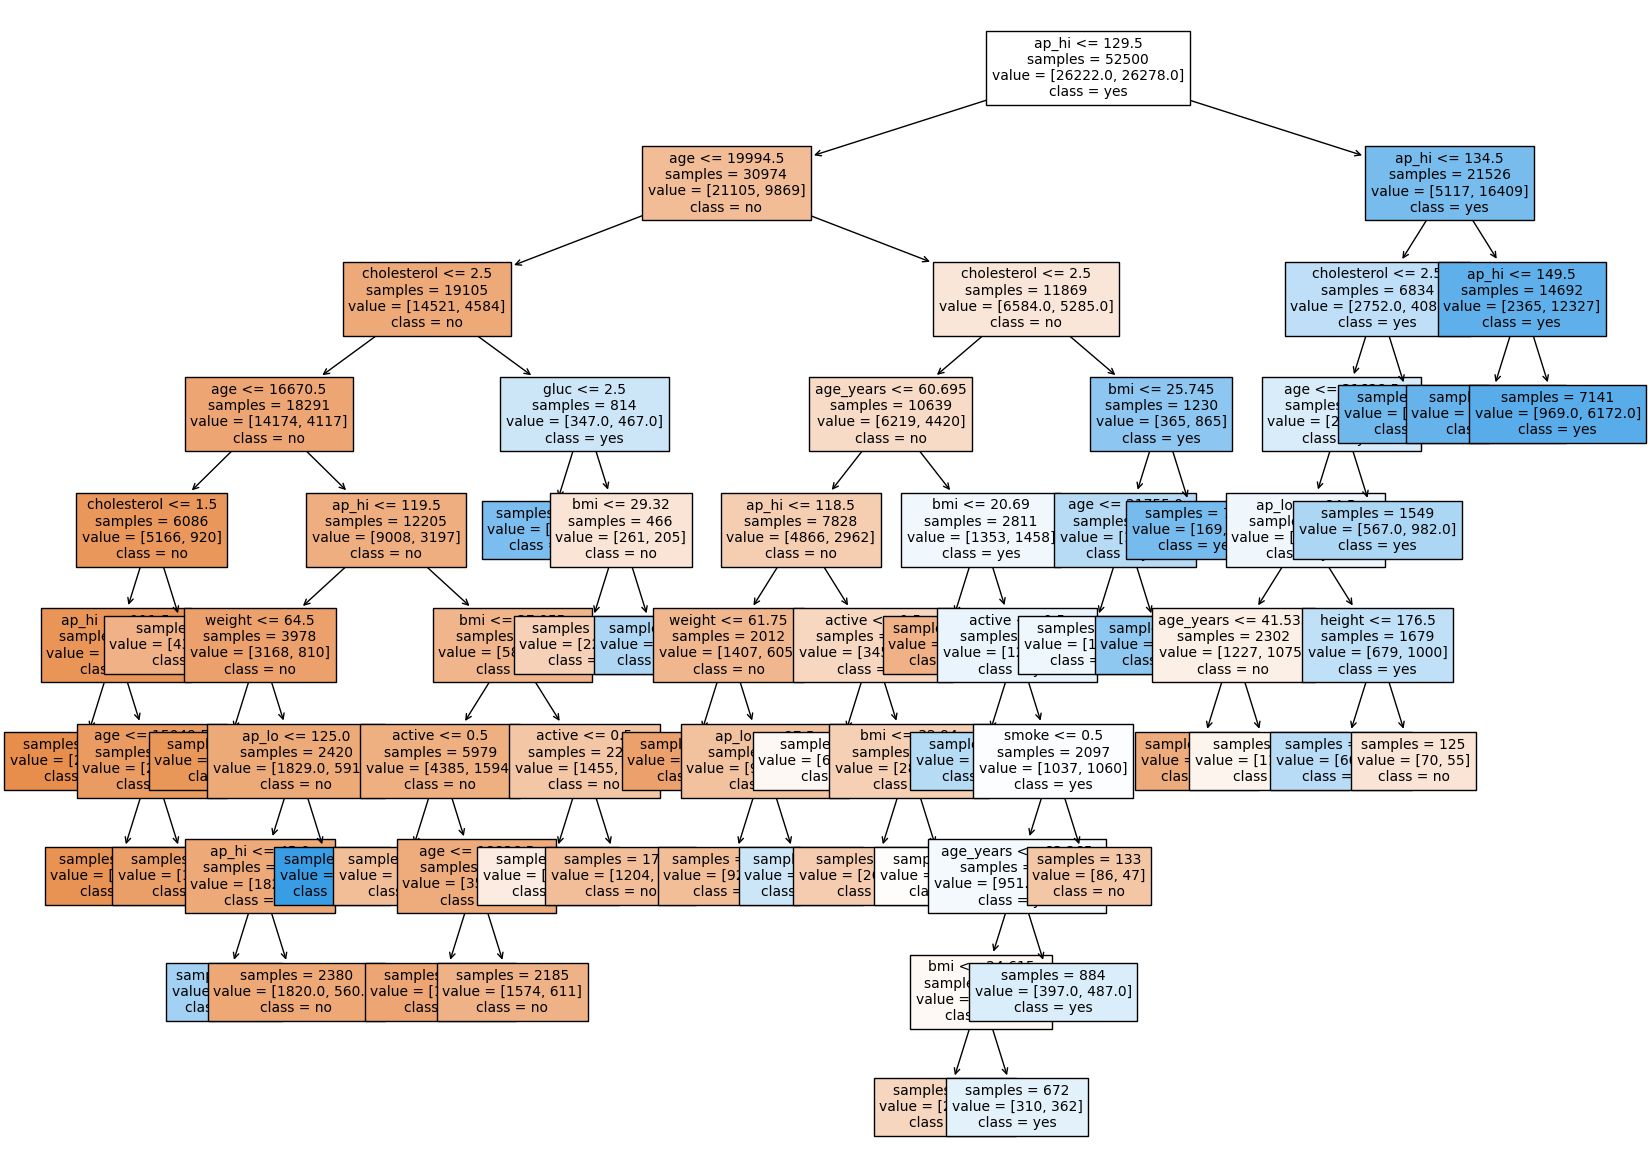

In [ ]:
# Estructura del árbol creado
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(20, 15))

print(f"Tree Depth: {prunedtree_I.get_depth()}")
print(f"Number of leaves or terminal nodes: {prunedtree_I.get_n_leaves()}")

plot = plot_tree(
            decision_tree = prunedtree_I,
            feature_names = labels.tolist(),
            class_names   = ['no', 'yes'],
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            ax            = ax
       )

El árbol creado tiene las siguientes características:
Profundidad =9; alpha=0.00012; accuracy=0.7370. El alpha tan bajo implica que en este caso lo óptimo es que haya poca penalización a una mayor complejidad.

## 3) MLP

In [43]:
raw_data.drop
raw_data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,age_years,overweight,gender_string,age_group,high_age
id,,,,,,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.97,50.39,0,male,50-55,False
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.93,55.42,2,female,55-60,False
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.51,51.66,0,female,50-55,False
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.71,48.28,1,male,45-50,False
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.01,47.87,0,female,45-50,False


In [44]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   age            70000 non-null  int64   
 1   gender         70000 non-null  int64   
 2   height         70000 non-null  int64   
 3   weight         70000 non-null  float64 
 4   ap_hi          70000 non-null  int64   
 5   ap_lo          70000 non-null  int64   
 6   cholesterol    70000 non-null  int64   
 7   gluc           70000 non-null  int64   
 8   smoke          70000 non-null  int64   
 9   alco           70000 non-null  int64   
 10  active         70000 non-null  int64   
 11  cardio         70000 non-null  int64   
 12  bmi            70000 non-null  float64 
 13  age_years      70000 non-null  float64 
 14  overweight     70000 non-null  int64   
 15  gender_string  70000 non-null  object  
 16  age_group      70000 non-null  category
 17  high_age       70000 non-null  bool 

In [45]:
# Normalization and new df
scaler = MinMaxScaler()
scaler.fit(raw_data)
data= scaler.transform(raw_data)

ValueError: could not convert string to float: 'male'